# Feature Creator

This tool can be used to easily define parameters used for assembly

# Imports

In [1]:
import pickle
import numpy as np
import rmlib

rm = rmlib.RMLib()

Robot Ready


# File Name

In [2]:
file_name = "assembly_features"

# Load/Create Dictionary 

In [48]:
try:
    with open(file_name, 'rb') as f:
        feature_dictionary = pickle.load(f)
        print("File Loaded")
        print('Dictionary Features:')
        for item1 in feature_dictionary:
            print(item1+":")
            for item2 in feature_dictionary[item1]:
                print('      ',item2,' = ',feature_dictionary[item1][item2])
                
except:
    print("No File Found, Creating New Dictionary")
    feature_dictionary = {}

File Loaded
Dictionary Features:
safe:
       pose  =  [-0.3326975734362312, 0.065341085944911, 0.2581550767146974, 2.221495104907732, -2.2198656234235354, -0.0017359476539100342]
block_1:
       view_distance  =  0.06
       cloud_locator_params  =  [170, 0.0008, 0.0033, 500]
       pose  =  [-0.3322111246491662, 0.03422645886125647, 0.03670808413502624, -2.2214513672646525, 2.2197534369799974, -0.0016888773446584906]
gear_1:
       view_distance  =  0.06
       circle_locator_params  =  [100, 20, 16, 33, 38, 0, 0.179]
       pose  =  [-0.26120607468147017, 0.15457276215156177, 0.01782762973027424, -2.2215290009359974, 2.2196592675480225, -0.0017161483294917436]


# Delete Feature

In [46]:
del_feature_name = 'block_5'
del feature_dictionary[del_feature_name]

# Set Feature Name

In [40]:
feature_name = "safe"
if not feature_name in feature_dictionary:
    feature_dictionary[feature_name] = {}
    print("Creating new feature")

Creating new feature


# Set Global Location

In [23]:
rm.close_gripper()

0

In [41]:
rm.align_gripper_with_axis()

In [42]:
#Move finger tips to part and save location
global_pose = rm.get_tcp_pose()
feature_dictionary[feature_name]["pose"] = global_pose

In [27]:
#Set view distance
view_distance = 0.06
feature_dictionary[feature_name]["view_distance"] = view_distance

#Move gripper to view location
rm.movel(np.add(global_pose,[0,0,view_distance,0,0,0]))
rm.move_camera_over_tcp()

# Move to Existing View Location

In [19]:
global_pose = feature_dictionary[feature_name]["pose"]
view_distance = feature_dictionary[feature_name]["view_distance"]

#Move gripper to view location
view_pose = rm.pose_trans(feature_dictionary[feature_name]['pose'],[-rm.camera_offset[0],-rm.camera_offset[1],-feature_dictionary[feature_name]['view_distance'],0,0,0])
rm.movel(view_pose)

1

# Circle Location Parameters

In [28]:
rm.open_gripper()

0

search parameters(circle_dia: 72 minR: 66px maxR: 76px)
[100, 20, 16, 33, 38, 0, 0.179]


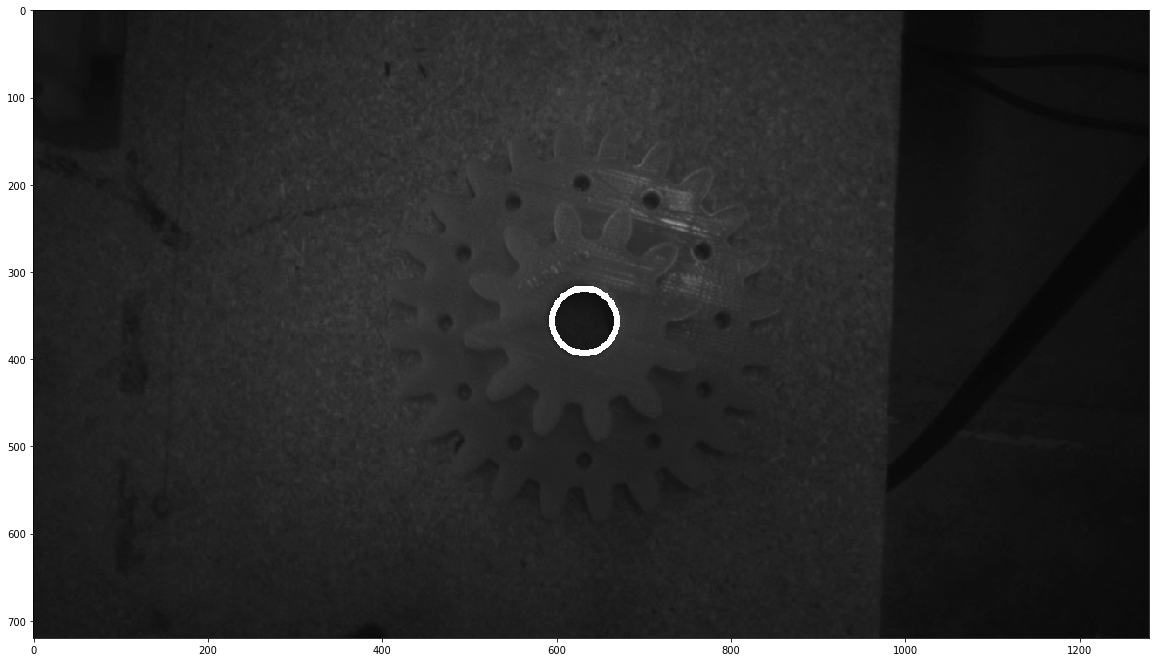

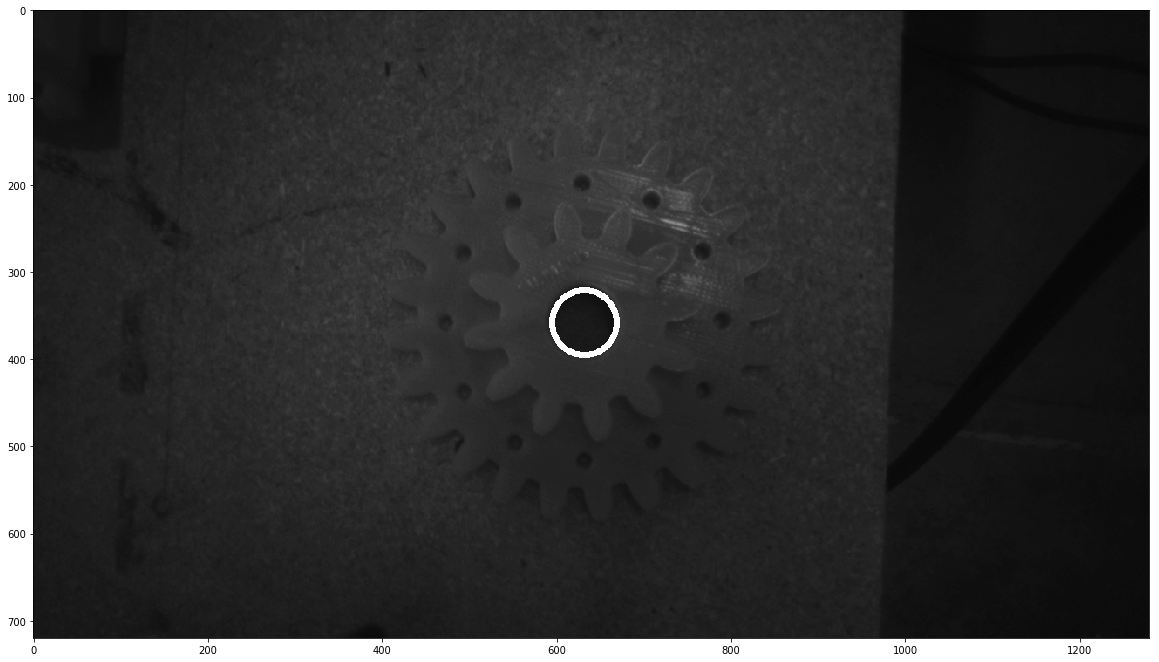

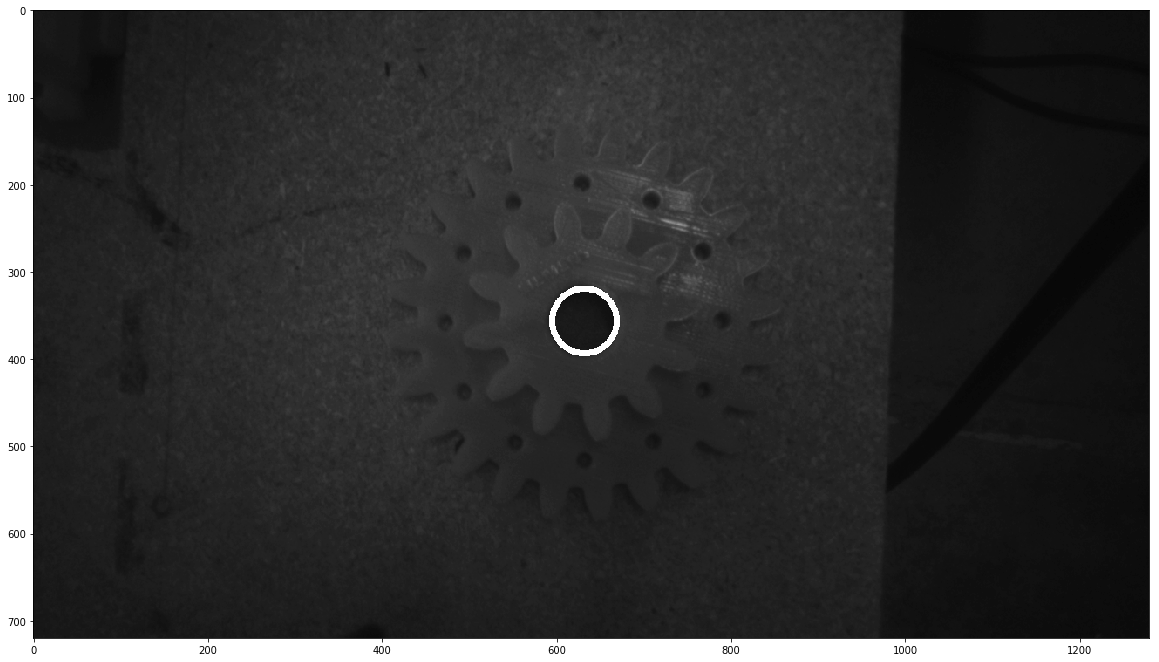

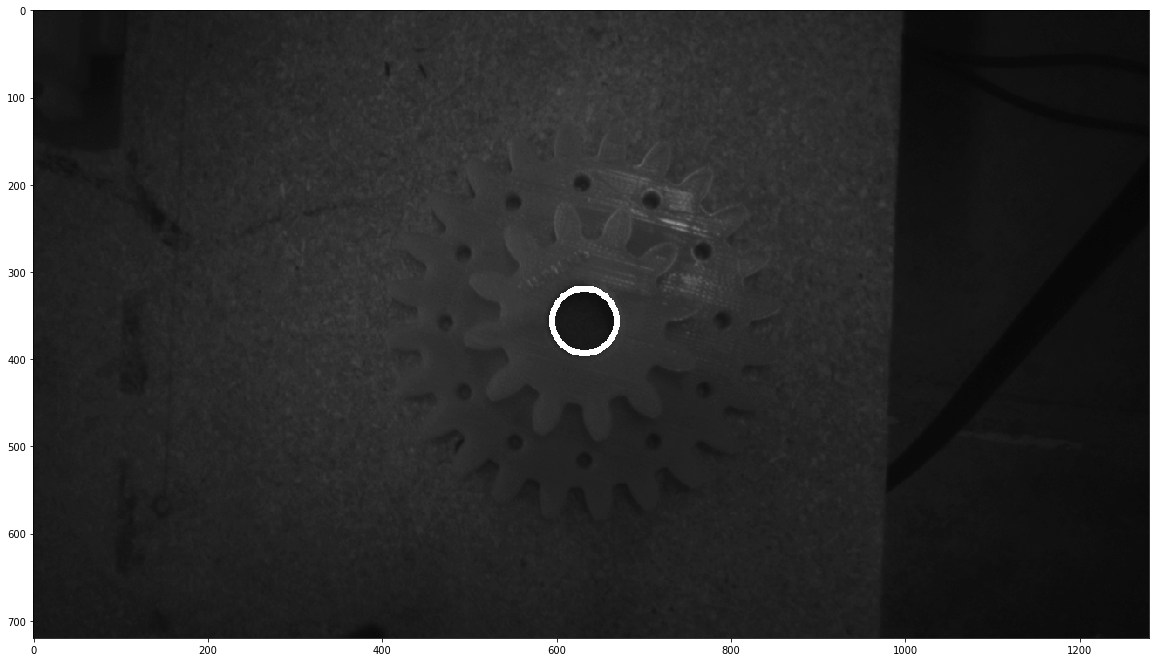

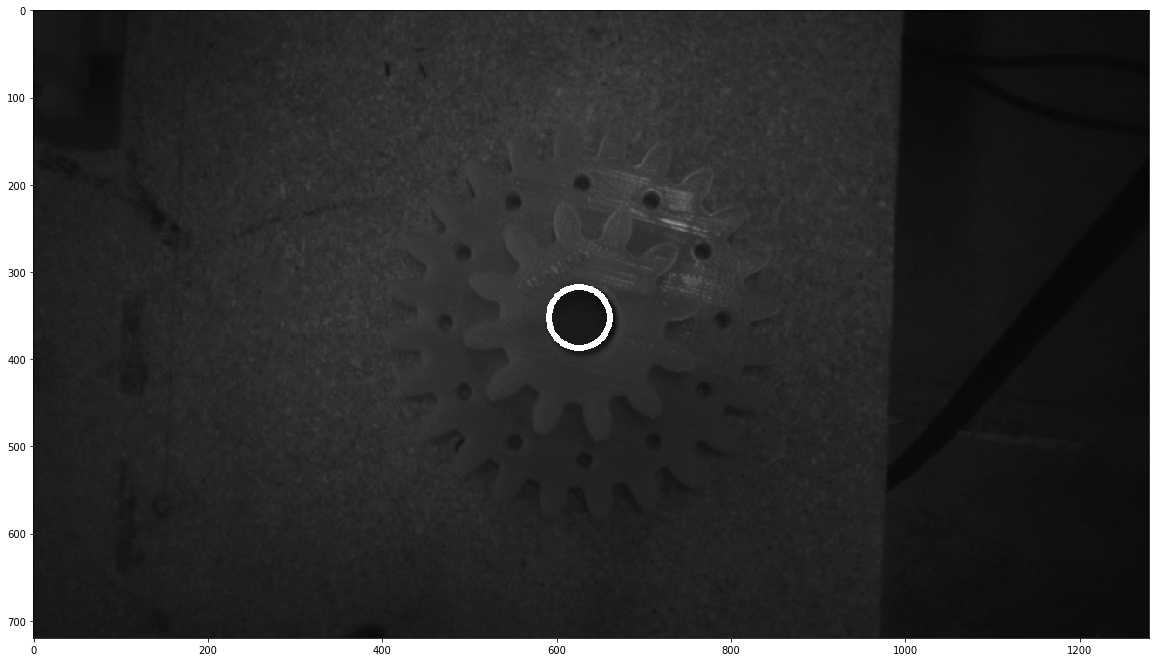

In [32]:
#Tune center circle parameters
#Tune parameters to minimize false circles and find desired circle in most images
view_distance = feature_dictionary[feature_name]["view_distance"]
circle_locator_params = rm.tune_circle_locator(min_hough_dist=100, param1=20, param2=16, image_blur=0, z_dist_to_cir=view_distance, cir_dia=0.014, dia_tol=0.001, max_loops=5)
print(circle_locator_params)
feature_dictionary[feature_name]["circle_locator_params"] = circle_locator_params

# General Part Location Parameters

In [9]:
rm.open_gripper()

0

In [20]:
#Tune general part parameters
general_part_locator_params = rm.tune_cloud_locator(disparity_shift=170, leaf_size=0.0008, search_radius=0.0033, min_cluster_size=500)
print(general_part_locator_params)
feature_dictionary[feature_name]["cloud_locator_params"] = general_part_locator_params

/home/nvidia/.local/lib/python3.5/site-packages/pythreejs/traits.py:177: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.024187176558894293, 0.10608660865084324, …

[170, 0.0008, 0.0033, 500]


# Save Feature

In [47]:
with open(file_name, 'wb') as f:
    pickle.dump(feature_dictionary, f, pickle.DEFAULT_PROTOCOL)